# Промышленность

## Предсказание конечной температуры сплава

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

## Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

### Обработаем `data_arc` и соеденим его с другими датафреймами (data_bulk, data_gas, data_wire)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_arc = pd.read_csv(r'..\data\raw\data_arc.csv')

In [3]:
df_arc.head()

key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.976059   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.805607   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.744363   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           1.659363   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.692755   

   Реактивная мощность  
0             0.687084  
1             0.520285  
2             0.498805  
3             1.062669  
4             0.414397

In [4]:
display(df_arc.info())
display(df_arc.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

key  Активная мощность  Реактивная мощность
count  14876.000000       14876.000000         14876.000000
mean    1615.220422           0.670441             0.452592
std      934.571502           0.408159             5.878702
min        1.000000           0.030002          -715.504924
25%      806.000000           0.395297             0.290991
50%     1617.000000           0.555517             0.415962
75%     2429.000000           0.857034             0.637371
max     3241.000000           3.731596             2.676388

Сразу обработаем отрицательное значение в реактивной мощности, как аномалию.

In [5]:
df_arc[df_arc['Реактивная мощность'] < 0] = df_arc['Реактивная мощность'].mean()

Создадим новый признак - энергия затрачиваемая на каждую стадию:
 $$ Q=\sqrt{(Pactive)^2 + (Preactive)^2} \over t $$ 

In [6]:
from src.features.Q_calculation import energy_calculation

In [7]:
energy_calculation(df_arc, 'Energy')

key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
0         1.0  2019-05-03 11:02:14 2019-05-03 11:06:02           0.976059   
1         1.0  2019-05-03 11:07:28 2019-05-03 11:10:33           0.805607   
2         1.0  2019-05-03 11:11:44 2019-05-03 11:14:36           0.744363   
3         1.0  2019-05-03 11:18:14 2019-05-03 11:24:19           1.659363   
4         1.0  2019-05-03 11:26:09 2019-05-03 11:28:37           0.692755   
...       ...                  ...                 ...                ...   
14871  3241.0  2019-09-01 03:58:58 2019-09-01 04:01:35           0.533670   
14872  3241.0  2019-09-01 04:05:04 2019-09-01 04:08:04           0.676604   
14873  3241.0  2019-09-01 04:16:41 2019-09-01 04:19:45           0.733899   
14874  3241.0  2019-09-01 04:31:51 2019-09-01 04:32:48           0.220694   
14875  3241.0  2019-09-01 04:34:47 2019-09-01 04:36:08           0.306580   

       Реактивная мощность      Energy  
0                 0.687084  221.543751  
1                 0.520285  136.121974  
2                 0.498805  121.331787  
3                 1.062669  548.537138  
4                 0.414397   86.734837  
...                    ...         ...  
14871             0.354439   78.696565  
14872             0.523631  133.294632  
14873             0.475654  123.772355  
14874             0.145768   11.750416  
14875             0.196708   22.533125  

[14876 rows x 6 columns]

Суммируем все данные по каждому образцу и оставляем только номер образца и количество энергии, затрачиваемое на его обработку, исключая остальные данные для дальнейшего объединения наших датафреймов.

In [8]:
from src.data.datamerge import dfprep

In [9]:
df_total = dfprep(df_arc, 'key')

Мёрджим все датафрейми к основному df_arc для дальнейшей обработки.

In [10]:
from src.data.datamerge import readcsvs
from src.data.datalist import csvlist
from src.data.datamerge import mergecsvs


In [11]:
csvs = readcsvs(csvlist)
df_total = mergecsvs(df_total, csvs)

In [12]:
display(df_total.head())
df_total.info()

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  ...     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  \
0     NaN  ...  60.059998      NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN  ...  96.052315      NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN  ...  91.160157      NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN  ...  89.063515      NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN  ...  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN   

   Wire 8  Wire 9       Energy  
0     NaN     NaN  1114.269487  
1     NaN     NaN   689.557348  
2     NaN     NaN   397.304683  
3     NaN     NaN   608.021227  
4     NaN     NaN   940.367293  

[5 rows x 27 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 0 to 3128
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
 16  Газ 1    3127 non-null   float64
 17  Wire 1   3000 non-null   float64
 18  Wire 2   1051 non-null   float64
 19  Wire 3   63 non-null     float64
 20  Wire 4   14 non-null     float64
 21  Wire 5   1 non

Заполним пропуска и переименуем колонки с русского на английский.

In [13]:
from src.data.datamerge import dfprepar
df_total = dfprepar(df_total,'Газ 1')

In [14]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 0 to 3128
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   3129 non-null   float64
 2   Bulk 2   3129 non-null   float64
 3   Bulk 3   3129 non-null   float64
 4   Bulk 4   3129 non-null   float64
 5   Bulk 5   3129 non-null   float64
 6   Bulk 6   3129 non-null   float64
 7   Bulk 7   3129 non-null   float64
 8   Bulk 8   3129 non-null   float64
 9   Bulk 9   3129 non-null   float64
 10  Bulk 10  3129 non-null   float64
 11  Bulk 11  3129 non-null   float64
 12  Bulk 12  3129 non-null   float64
 13  Bulk 13  3129 non-null   float64
 14  Bulk 14  3129 non-null   float64
 15  Bulk 15  3129 non-null   float64
 16  Gas      3129 non-null   float64
 17  Wire 1   3129 non-null   float64
 18  Wire 2   3129 non-null   float64
 19  Wire 3   3129 non-null   float64
 20  Wire 4   3129 non-null   float64
 21  Wire 5   3129 

### Обработаем `data_temp` и соеденим его с `df_total` для дальнейшей изучения 

In [15]:
df_temp = pd.read_csv(r'..\data\raw\data_temp.csv')
df_temp.columns = ['key', 'Time', 'Temperature']

In [16]:
print(df_temp.head(20))
display(df_temp.info())
display(df_temp.describe())

    key                 Time  Temperature
0     1  2019-05-03 11:16:18       1571.0
1     1  2019-05-03 11:25:53       1604.0
2     1  2019-05-03 11:29:11       1618.0
3     1  2019-05-03 11:30:01       1601.0
4     1  2019-05-03 11:30:39       1613.0
5     2  2019-05-03 11:37:27       1581.0
6     2  2019-05-03 11:38:00       1577.0
7     2  2019-05-03 11:49:38       1589.0
8     2  2019-05-03 11:55:50       1604.0
9     2  2019-05-03 11:58:24       1608.0
10    2  2019-05-03 11:59:12       1602.0
11    3  2019-05-03 12:13:17       1596.0
12    3  2019-05-03 12:18:36       1597.0
13    3  2019-05-03 12:25:06       1598.0
14    3  2019-05-03 12:30:48       1599.0
15    3  2019-05-03 12:34:57       1599.0
16    4  2019-05-03 12:52:57       1601.0
17    4  2019-05-03 12:58:43       1623.0
18    4  2019-05-03 12:59:25       1625.0
19    5  2019-05-03 13:23:19       1576.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Colum

None

key   Temperature
count  15907.000000  13006.000000
mean    1607.880870   1591.840920
std      942.212073     21.375851
min        1.000000   1191.000000
25%      790.000000   1581.000000
50%     1618.000000   1591.000000
75%     2427.000000   1601.000000
max     3241.000000   1705.000000

In [17]:
print(df_temp['key'].value_counts())

46      16
1214    16
44      16
1513    16
2108    15
        ..
1160     2
982      2
2456     2
195      1
279      1
Name: key, Length: 3216, dtype: int64


In [18]:
from src.data.datatemp import dfpreptemp

У каждой партии происходит несколько стадий обработки до состояния готового продукта. Соотвественно, нас интересуют те образцы, по которым минимум 2 замера температуры и образцы, по которым есть первый и последний замеры температуры.

In [19]:
df_total = dfpreptemp(df_temp, df_total, df_temp.columns, ['key', 'Initial Temp', 'Final Temp'])

In [20]:
df_total.reset_index()

index   key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  \
0         0     1     0.0     0.0     0.0    43.0     0.0     0.0     0.0   
1         1     2     0.0     0.0     0.0    73.0     0.0     0.0     0.0   
2         2     3     0.0     0.0     0.0    34.0     0.0     0.0     0.0   
3         3     4     0.0     0.0     0.0    81.0     0.0     0.0     0.0   
4         4     5     0.0     0.0     0.0    78.0     0.0     0.0     0.0   
...     ...   ...     ...     ...     ...     ...     ...     ...     ...   
2403   2403  2495     0.0     0.0    21.0     0.0     0.0     0.0     0.0   
2404   2404  2496     0.0     0.0     0.0    63.0     0.0     0.0     0.0   
2405   2405  2497     0.0     0.0     0.0    85.0     0.0     0.0     0.0   
2406   2406  2498     0.0     0.0    90.0     0.0     0.0     0.0     0.0   
2407   2407  2499     0.0     0.0    47.0     0.0     0.0     0.0     0.0   

      Bulk 8  ...  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  Wire 9  \
0        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
2403     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2404     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2405     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2406     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2407     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

           Energy  Initial Temp  Final Temp  
0     1114.269487        1571.0      1613.0  
1      689.557348        1581.0      1602.0  
2      397.304683        1596.0      1599.0  
3      608.021227        1601.0      1625.0  
4      940.367293        1576.0      1602.0  
...           ...           ...         ...  
2403   654.176286        1570.0      1591.0  
2404   687.084441        1554.0      1591.0  
2405   504.643758        1571.0      1589.0  
2406   620.706245        1591.0      1594.0  
2407  1036.775441        1569.0      1603.0  

[2408 rows x 30 columns]

In [21]:
from src.data.datamerge import missing
missing(df_total)
pd.set_option('display.max_rows', None)

              missing_values  % of total
key                        0         0.0
Bulk 15                    0         0.0
Initial Temp               0         0.0
Energy                     0         0.0
Wire 9                     0         0.0
Wire 8                     0         0.0
Wire 7                     0         0.0
Wire 6                     0         0.0
Wire 5                     0         0.0
Wire 4                     0         0.0
Wire 3                     0         0.0
Wire 2                     0         0.0
Wire 1                     0         0.0
Gas                        0         0.0
Bulk 14                    0         0.0
Bulk 1                     0         0.0
Bulk 13                    0         0.0
Bulk 12                    0         0.0
Bulk 11                    0         0.0
Bulk 10                    0         0.0
Bulk 9                     0         0.0
Bulk 8                     0         0.0
Bulk 7                     0         0.0
Bulk 6          

In [22]:
from src.features.vizual import boxplotss

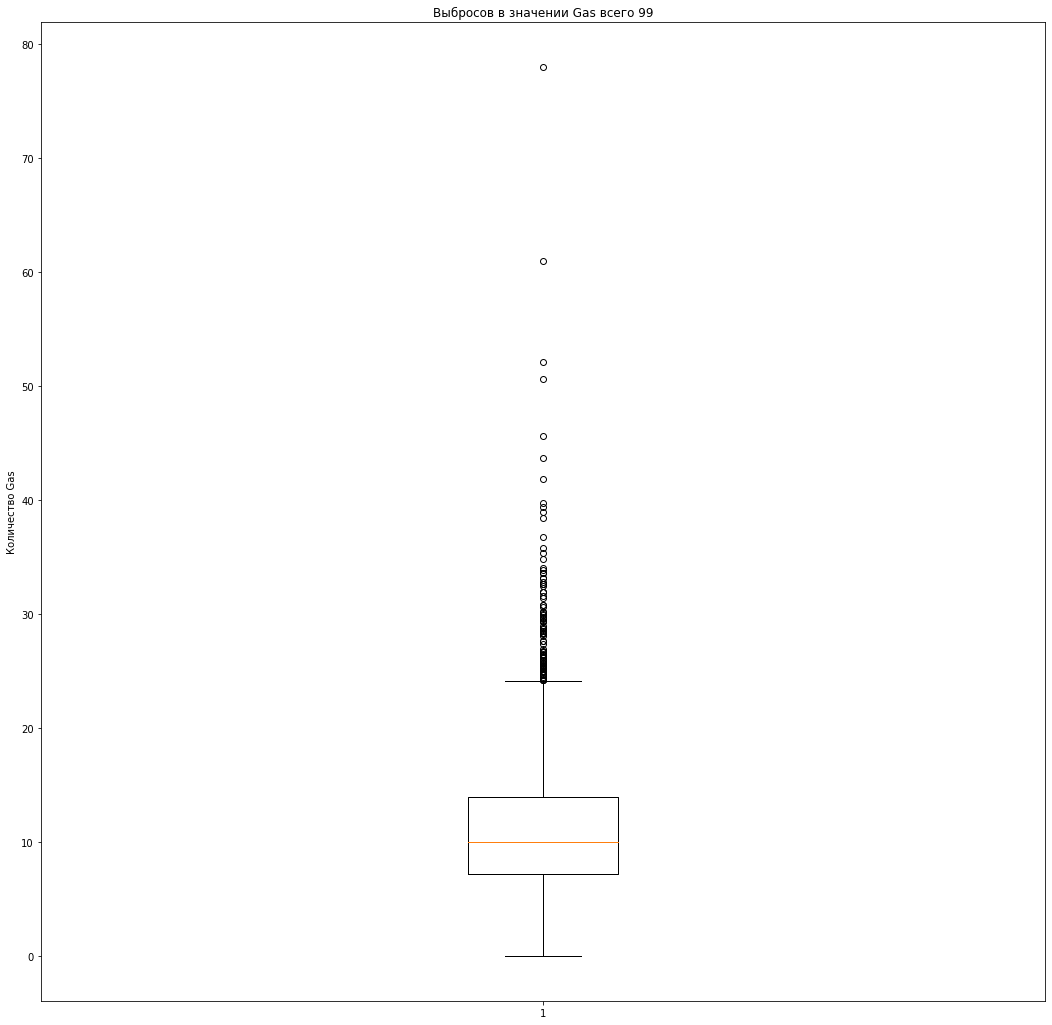

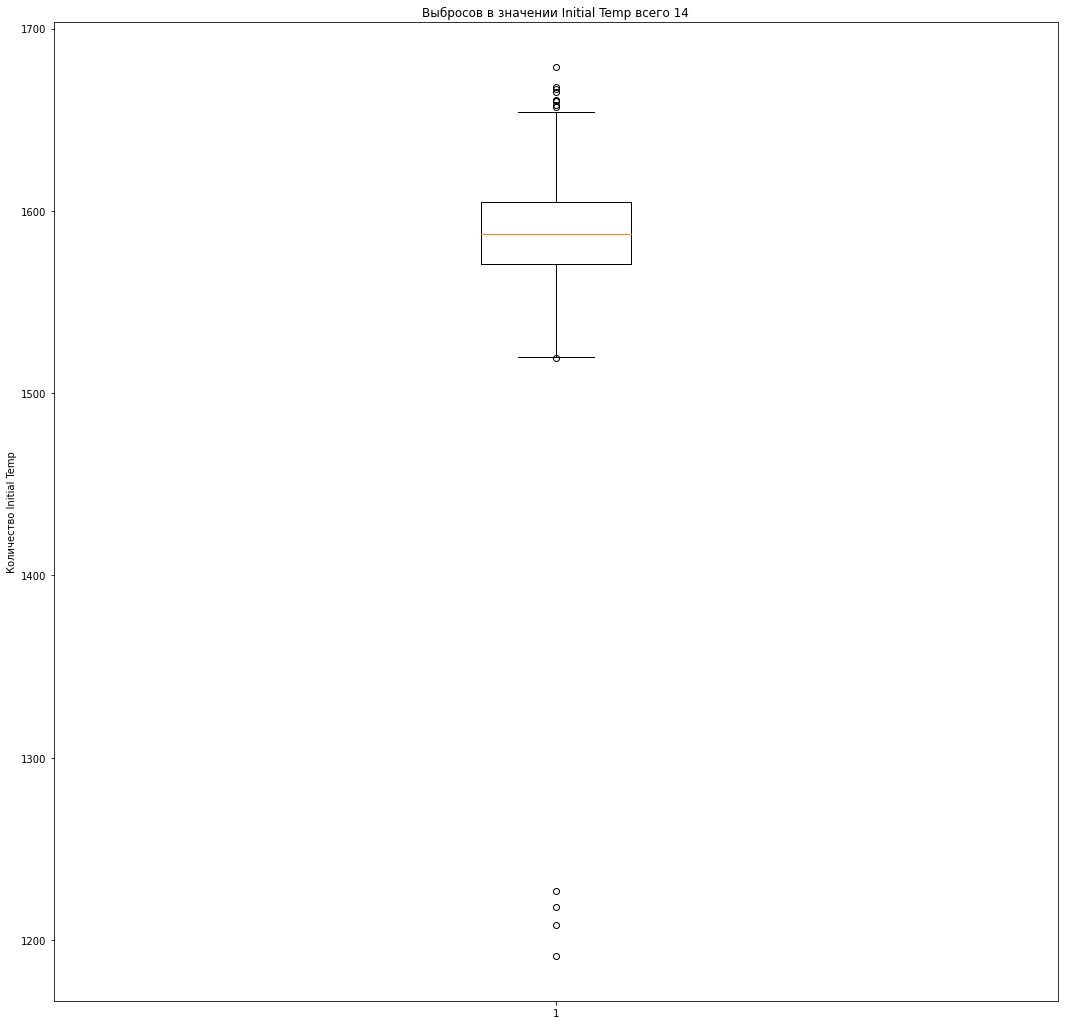

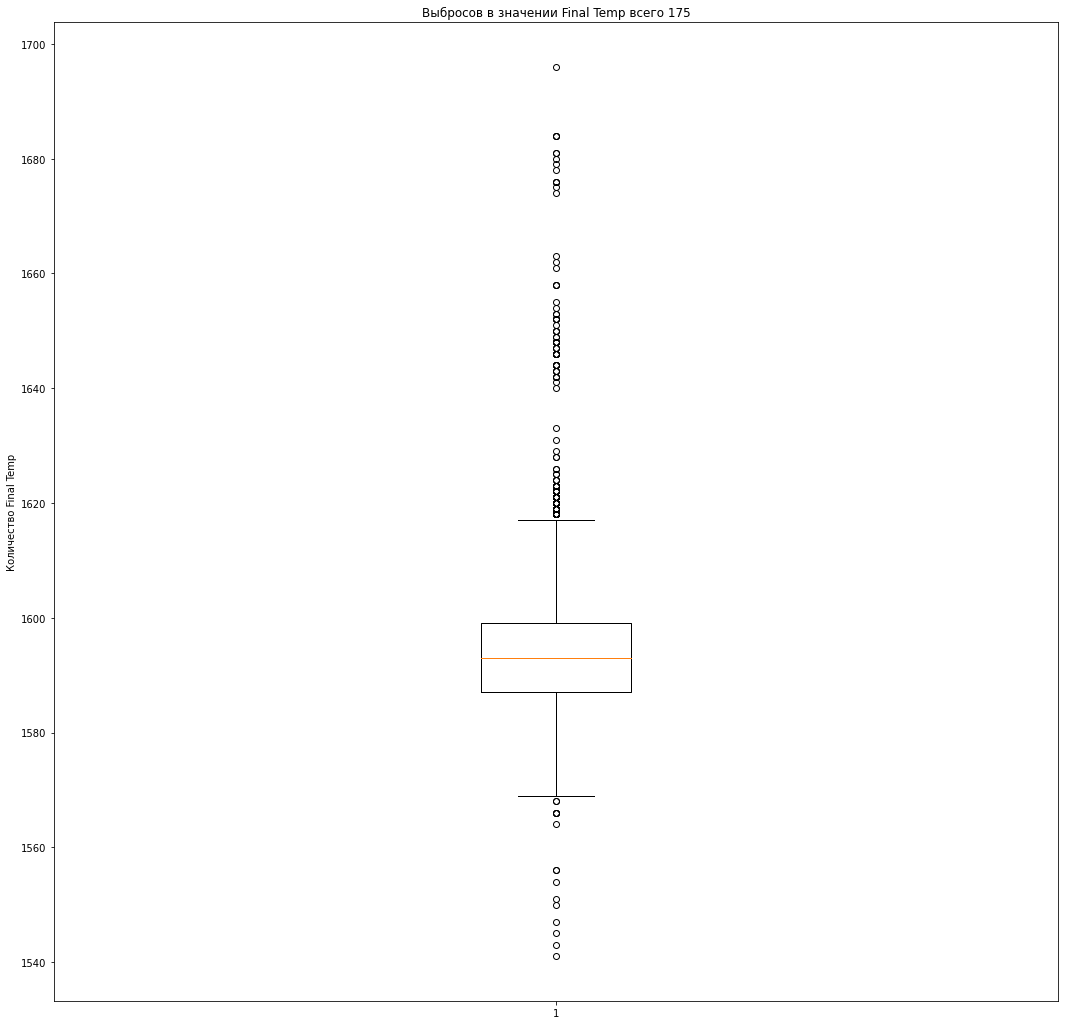

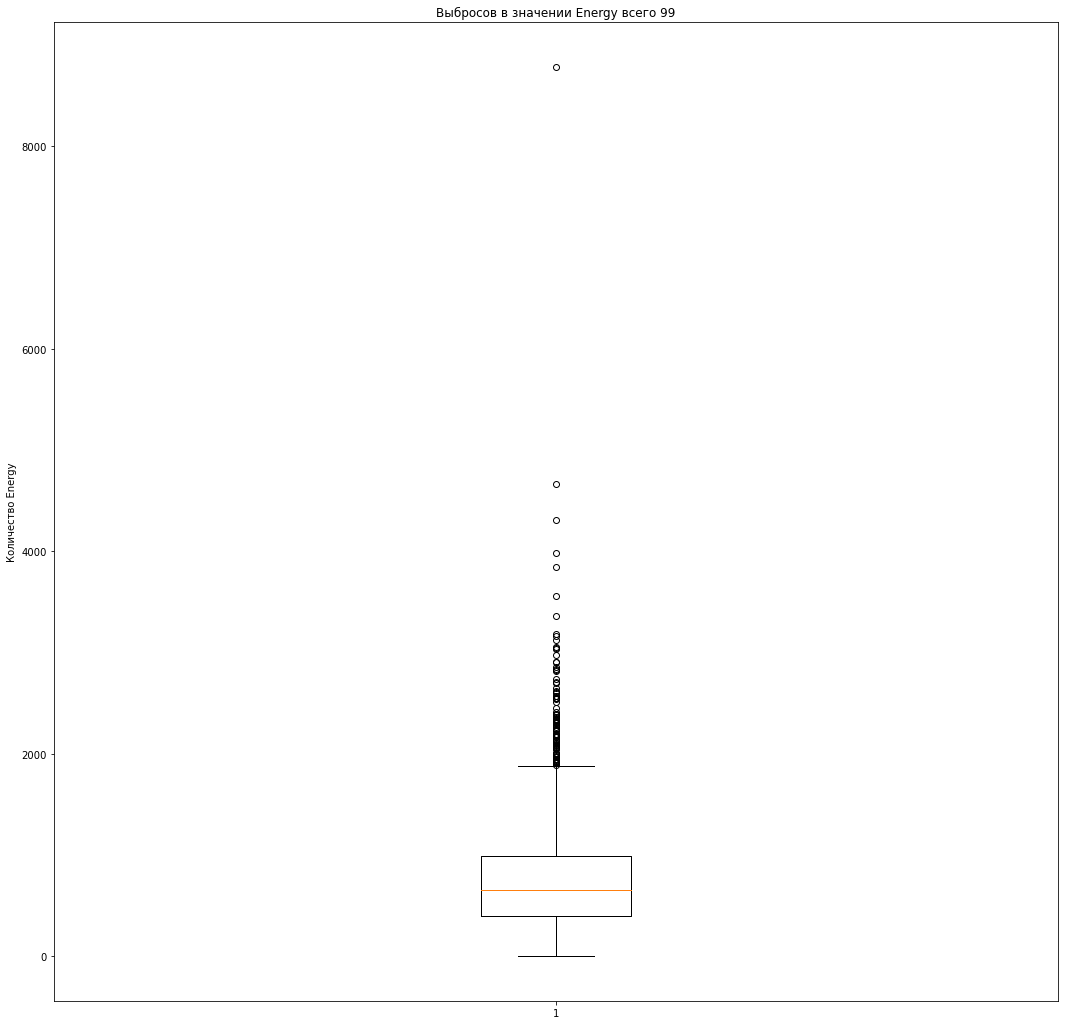

In [23]:
boxplotss(df_total, ['Gas', 'Initial Temp', 'Final Temp', 'Energy'], r'..\reports\figures')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import copy
import pandas as pd

In [26]:
target = df_total['Final Temp']
features = df_total.drop('Final Temp', axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test) 

Mae Lasso: 7.920207586974309


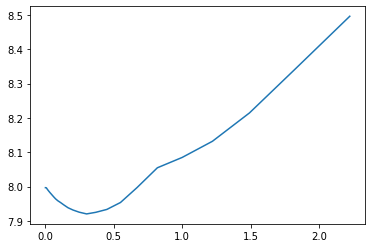

In [27]:
from sklearn.linear_model import Lasso

alphas = np.exp(np.arange(-10, 1, 0.2))
errors = []
for alpha in alphas:
    ls = Lasso(alpha=alpha, random_state = 12345)
    ls.fit(features_train, target_train)
    LR_predict = ls.predict(features_test) 
    Imae_LS = mean_absolute_error(target_test, LR_predict)
    errors.append(Imae_LS)
    
print('Mae Lasso:', min(errors))
plt.plot(alphas, errors)

In [28]:
df_total_nl = copy.deepcopy(df_total)

In [29]:
from src.models.models import model_learning
resuling_df = model_learning(df_total_nl,'Final Temp')

TypeError: model_learning() missing 1 required positional argument: 'modellist'

In [32]:
target = df_total_nl['Final Temp']
features = df_total_nl.drop('Final Temp', axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [33]:
model_RFR = RandomForestRegressor(random_state=12345)
model_RFR.fit(features_train, target_train)
RFR_predict = model_RFR.predict(features_test)
Imae_RFR = mean_absolute_error(target_test, RFR_predict)
print('mae: %.2f градусов' % (Imae_RFR))
print(df_total['Final Temp'].mean())

mae: 6.78 градусов
1594.8816445182724


CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\User\.conda\envs\cookiecutter\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


(RandomForestRegressor(criterion='mae', max_depth=4, n_estimators=50,
                      random_state=12345), 7.258471760797343)


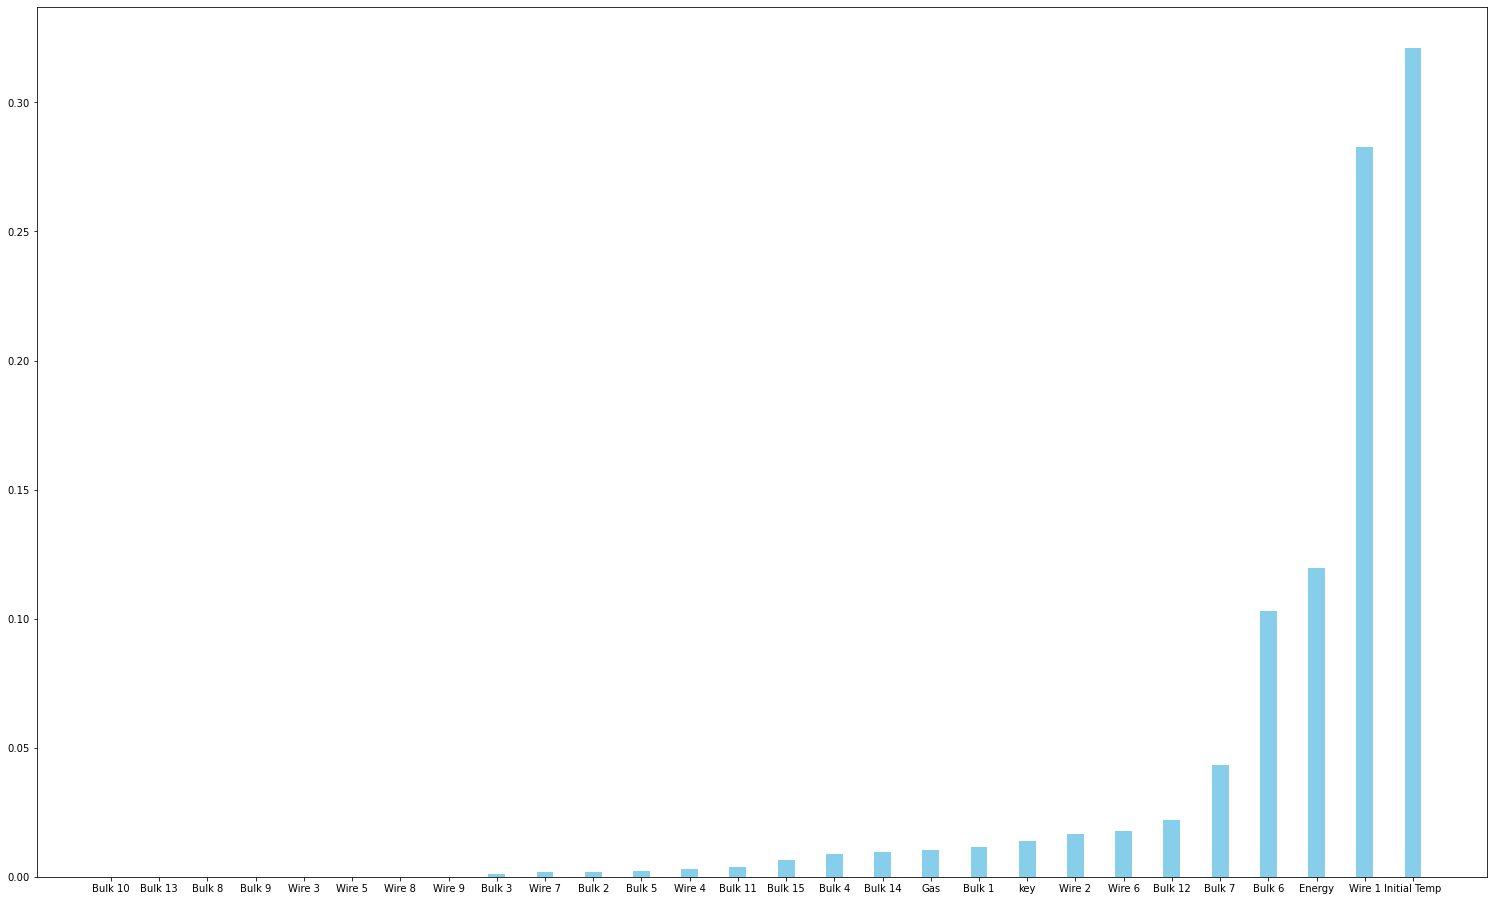

In [40]:
%time
model_RFR_L = RandomForestRegressor(random_state=12345)
parameters_RFR = {'max_depth' : list(range(2, 6, 2)),
                  'n_estimators': list(range(50, 200, 50)),
                  'criterion' : ['mae'],
                 }

def model_parameters(f_train, t_train, f_test, t_test, model, parameters):
    Mmodel = GridSearchCV(model, param_grid = parameters_RFR, n_jobs = -1, cv = 5)
    Mmodel.fit(f_train, t_train)
    MP = Mmodel.best_estimator_
    predictions_RFR = MP.predict(f_test)
    mae_RFR = mean_absolute_error(t_test, predictions_RFR)
    feature_importances = sorted(list(zip(MP.feature_importances_, features.columns)), reverse=False)
    plt.figure(figsize=(26, 16))
    plt.bar(height = list(map(lambda x: x[0], feature_importances)), x =list(map(lambda x: x[1], feature_importances)), width = 0.35, color='skyblue')
    return (MP, mae_RFR)
print(model_parameters(features_train, target_train, features_test, target_test, model_RFR_L, parameters_RFR))

In [ ]:
Model_list = [linear, RFR]
model_parameters = 